#### 앙상블<br>
여러 머신러닝 모델을 생성하고 그 예측을 결합함으로써 보다 정확한 최종 예측을 도출하는 방법<br>

앙상블의 종류 : 보팅(Voting), **배깅(Bagging)**, **부스팅(Boosting)**, 스태킹(Stacking)
<br>
---
* 보팅 : 서로 다른 알고리즘 모델을 같은 데이터로 학습시켜서 투표를 통해 최종 예측 결과를 도출<br>
    * 하드 보팅 : 각 알고리즘 모델의 결과를 투표 방식으로 최종 예측 결과로 선정
    * 소프트 보팅 : 각 알고리즘 모델의 클래스별 예측 확률을 평균 내어 확률이 가장 높은 클래스를 최종 예측 결과로 선정<br>
<img src="../이미지/보팅.png" width="40%" height="30%" title="px(픽셀) 크기 설정" alt="RubberDuck"></img>
<br><br>

* 배깅 : 같은 알고리즘 모델을 학습 시킬 때, 부트스트랩 방법을 이용하여 샘플 데이터를 만들어서 학습 후 최종 예측 결과를 도출
    * 부트스트랩 (Bootstrap) : 복원 랜덤 추출로 샘플 데이터를 만드는 방법
    * 최종 예측 결과를 선정할 때는 Categorical 데이터는 투표 방식, Continuous 데이터는 평균으로 집계
    * 전체 데이터의 약 37%에 해당하는 oob데이터가 생김 <br>
    * **ex) 랜덤포레스트**
<img src="../이미지/배깅.png" width="40%" height="30%" title="px(픽셀) 크기 설정" alt="RubberDuck"></img>
<br><br>

* 부스팅 : 모델들이 순차적으로 학습이 진행되며 최종 예측 결과를 도출
    * 다른 알고리즘들과는 다르게 모델 학습이 병렬로 진행되는 것이 아니라, 직렬형태로 진행
    * 앞에서 예측한 모델이 틀린 데이터에 대해 가중치를 부여하여 학습을 진행
    * ex) AdaBoost, GBM(Gradient Boosting Machine), XGBoost, LightBoost<br>
<img src="../이미지/부스팅.png" width="40%" height="30%" title="px(픽셀) 크기 설정" alt="RubberDuck"></img>
<br><br>
   
* 스태킹 : 여러 모델들의 예측 결과를 최종 모델의 학습 데이터로 사용<br>
<img src="../이미지/스태킹.png" width="40%" height="30%" title="px(픽셀) 크기 설정" alt="RubberDuck"></img>
<br><br>
---
**from sklearn.ensemble import BaggingClassifier**<br>
**from sklearn.ensemble import BaggingRegressor**<br><br>
**from sklearn.ensemble import AdaBoostClassifier**<br>
**from sklearn.ensemble import AdaBoostRegressor**<br><br>
**from sklearn.ensemble import RandomForestClassifier**<br>
**from sklearn.ensemble import RandomForestRegressor**<br>

##### 배깅

#### (1) 매개변수
base_estmiator : 배깅에서 수행할 분류기
- default = DecisionTreeClassifier
- object형 
- **estimator로 변경**

n_estimators : 앙상블 분류기 모델 수 설정
- default = 10/ int형

max_samples : 각 기본 추정량을 훈련하기 위해 추출할 샘플의 수
- defaut = 1.0
- float형 -> max_samples * x.shape[0]
- int형 -> max_samples수

max_features : 각 기본 추정량을 훈련하기 위해 추출할 컬럼의 수
-defaut = 1.0
- float형 -> max_samples * x.shape[0]
- int형 -> max_samples수

bootstrap : 샘플을 복원추출할지 여부를 결정
- default = True
- bool형

bootstrap_features : feature를 복원할지 여부를 결정
- default = True
- bool형

oob_score : 일반화 오류를 추정하기 위해 out-of-bag 샘플을 사용할지 여부를 결정
- default = False
- bool형

---
#### (2) 속성
oob_score_ : out-of-bag을 사용해 얻은 train 데이터세트의 점수
- oob_score_를 얻기 위해서는 oob_score 매개변수가 True로 설정되어야 한다.
- float 타입

---
#### (3) 메서드
fit(X,y) : 모델을 학습
- X : 학습데이터, 2차원 array 형태로 입력
- Y : 타깃데이터, (n_samples,) 또는 (n_samples, n_targets) 형태로 입력
- 반환값 : 배깅 추정기를 object로 반환

predict(X) : 배깅을 사용해 예측
- X : 데이터샘플
- 반환값 : 예측값을 array로 반환

predict_proba(X) : 확률을 추정
- X : 데이터샘플
- 반환값 : 클래스에 대한 샘플데이터의 확률
- classifier에만 사용 가능

score(X,y) : 예측의 평균 정확도를 반환
- X : 테스트 샘플을 array로 입력
- y : X의 실제 값
- 반환값 : 평균 정확도를 float로 반환

In [88]:
import pandas as pd
breast = pd.read_csv('https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/breast-cancer.csv')

In [89]:
breast.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


<Axes: xlabel='diagnosis', ylabel='count'>

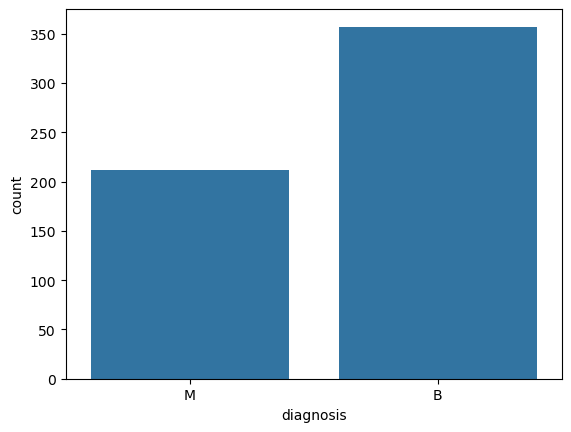

In [90]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure()
sns.countplot(x = 'diagnosis', data = breast)

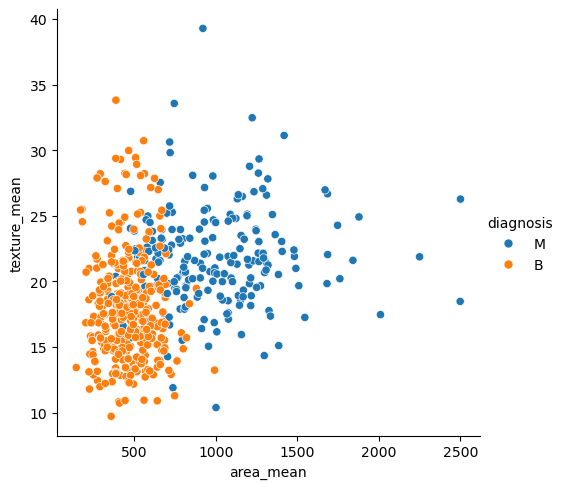

In [35]:
sns.relplot(x = 'area_mean', y = 'texture_mean', hue = 'diagnosis', data = breast)

In [36]:
import numpy as np
from sklearn.model_selection import train_test_split

breast['diagnosis'] = np.where(breast['diagnosis'] == 'M',1,0)
features = ['area_mean','area_worst']
x = breast[features]
y = breast['diagnosis']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, stratify = y, random_state = 1)

print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(398, 2) (171, 2)
(398,) (171,)


In [37]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

# clf = BaggingClassifier(base_estimator=DecisionTreeClassifier())
clf = BaggingClassifier(estimator=DecisionTreeClassifier())
pred = clf.fit(x_train, y_train).predict(x_test)
print('Accuracy Score : ', clf.score(x_test, y_test))

Accuracy Score :  0.9181286549707602


In [38]:
from sklearn.metrics import confusion_matrix

pd.DataFrame(confusion_matrix(y_test, pred),
            index = ['True[0]','True[1]'],
            columns = ['Pred[0]','Pred[1]'])

,Pred[0],Pred[1]
True[0],103,4
True[1],10,54


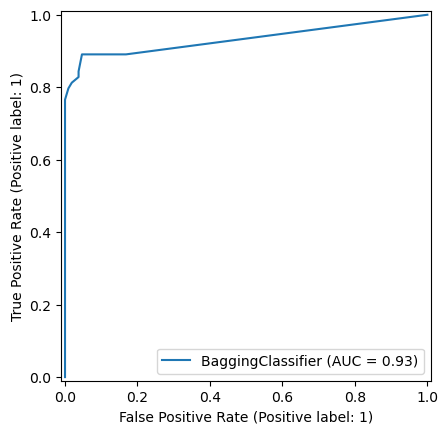

In [39]:
import matplotlib.pyplot as plt
# from sklearn.metrics import plot_roc_curve, roc_auc_score
from sklearn.metrics import RocCurveDisplay

# plot_roc_curve(clf, x_test, y_test)
RocCurveDisplay.from_estimator(clf, x_test, y_test)
plt.show()

In [20]:
clf_oob = BaggingClassifier(estimator = DecisionTreeClassifier(), oob_score = True)
oob = clf_oob.fit(x,y).oob_score_
print(oob)

0.9191564147627417


C:\Users\USER\.conda\envs\adp\lib\site-packages\sklearn\ensemble\_bagging.py:769: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
C:\Users\USER\.conda\envs\adp\lib\site-packages\sklearn\ensemble\_bagging.py:775: RuntimeWarning: invalid value encountered in divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]


In [4]:
import pandas as pd
car = pd.read_csv('https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/CarPrice_Assignment.csv')
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [5]:
car_num = car.select_dtypes(['number'])
features = list(car_num.columns.difference(['car_ID','symboling','price']))

x = car_num[features]
y = car_num['price']
print(x.shape, y.shape)

(205, 13) (205,)


In [7]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

reg = BaggingRegressor(estimator = DecisionTreeRegressor(), oob_score = True)
reg = reg.fit(x,y)
reg.oob_score_

0.9210264282191679

##### 부스팅

#### (1) 매개변수
base_estmiator : 배깅에서 수행할 분류기
- default = DecisionTreeClassifier
- object형
- **estimator로 변경**

n_estimators : 앙상블 분류기 모델 수 설정
- default = 10
- int형

learning_rate : 각 부스팅의 반복 시 분류기에 적용되는 가중치
- default = 50
- int형
- 학습률이 높을수록 각 분류기의 기여도가 높아진다.

loss : 각각의 부스팅 반복 후 가중치를 업데이트 할 때 사용하는 손실 함수를 설정
- default = linear
- 'linear','square','exponential' 중 선택
- regressor만 사용 가능

random_state : 각 부스팅의 base_estimator에서 random seed를 제어
- default = None
- int형

---
#### (2) 속성
feature_importances_ : 불순도를 기반으로 하는 변수중요도를 출력
-(n_features,)형태의 array

---
#### (3) 메서드
fit(X,y) : 모델을 학습
- X : 학습데이터, 2차원 array 형태로 입력
- Y : 타깃데이터, (n_samples,) 또는 (n_samples, n_targets) 형태로 입력
- 반환값 : 추정기를 object로 반환

predict(X) : 부스팅을 사용해 예측
- X : 데이터샘플
- 반환값 : 예측값을 array로 반환

predict_proba(X) : 확률을 추정
- X : 데이터샘플
- 반환값 : 클래스에 대한 샘플데이터의 확률
- classifier에만 사용 가능

score(X,y) : 예측의 평균 정확도를 반환
- X : 테스트 샘플을 array로 입력
- y : X의 실제 값
- 반환값 : 평균 정확도를 float로 반환

In [92]:
import pandas as pd
breast = pd.read_csv('https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/breast-cancer.csv')

import numpy as np
from sklearn.model_selection import train_test_split
breast['diagnosis'] = np.where(breast['diagnosis'] == 'M',1,0)
features = ['area_mean','texture_mean']
x = breast[features]
y = breast['diagnosis']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3, stratify = y, random_state = 1)
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(398, 2) (171, 2)
(398,) (171,)


In [93]:
from sklearn.ensemble import AdaBoostClassifier

clf = AdaBoostClassifier(estimator = None)
pred = clf.fit(x_train, y_train).predict(x_test)
print('정확도 : ',clf.score(x_test, y_test))

정확도 :  0.9122807017543859


C:\Users\USER\.conda\envs\adp\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [94]:
from sklearn.metrics import confusion_matrix, accuracy_score,precision_score, recall_score, f1_score

pred = clf.predict(x_test)

test_cm = confusion_matrix(y_test, pred)
test_acc = accuracy_score(y_test, pred)
test_prc = precision_score(y_test, pred)
test_rcll = recall_score(y_test, pred)
test_f1 = f1_score(y_test, pred)

print('행 : pred, 열 : actual')
print(test_cm)
print('\n')
print('정확도\t{}%'.format(round(test_acc*100,2)))
print('정밀도\t{}%'.format(round(test_prc*100,2)))
print('재현율\t{}%'.format(round(test_rcll*100,2)))
print('f1\t{}%'.format(round(test_f1*100,3)))

행 : pred, 열 : actual
[[102   5]
 [ 10  54]]


정확도	91.23%
정밀도	91.53%
재현율	84.38%
f1	87.805%


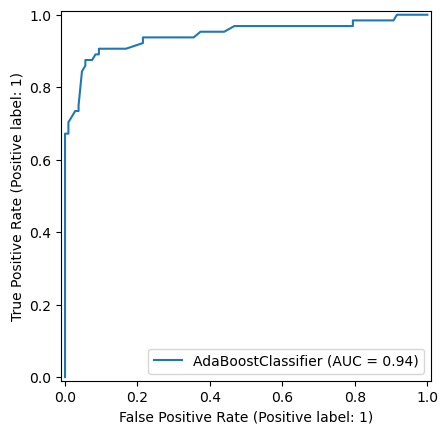

In [95]:
import matplotlib.pyplot as plt
# from sklearn.metrics import plot_roc_curve, roc_auc_score
from sklearn.metrics import RocCurveDisplay

# plot_roc_curve(clf, x_test, y_test)
RocCurveDisplay.from_estimator(clf, x_test, y_test)
plt.show()

In [45]:
importances = clf.feature_importances_
column_nm = pd.DataFrame(['area_mean','texture_mean'])
feature_importances = pd.concat([column_nm, pd.DataFrame(importances)], axis = 1)
feature_importances.columns = ['feature_nm','importances']
print(feature_importances)

     feature_nm  importances
0     area_mean         0.56
1  texture_mean         0.44


<BarContainer object of 2 artists>

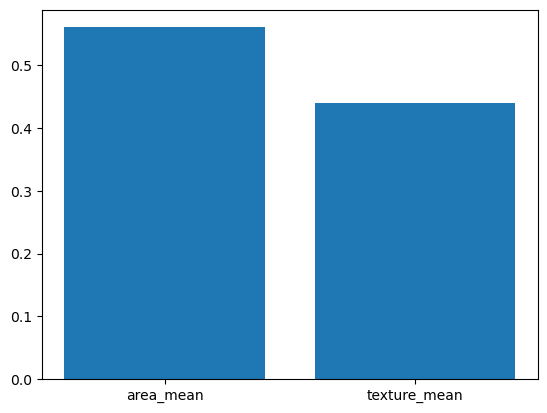

In [46]:
f = features
xtick_label_position = list(range(len(f)))
plt.xticks(xtick_label_position,f)
plt.bar([x for x in range(len(importances))], importances)

In [52]:
import pandas as pd
car = pd.read_csv('https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/CarPrice_Assignment.csv')

car_num = car.select_dtypes(['number'])
features = list(car_num.columns.difference(['car_ID','symboling','price']))
x = car_num[features]
y = car_num['price']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1)
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(143, 13) (62, 13)
(143,) (62,)


In [54]:
from sklearn.ensemble import AdaBoostRegressor

reg = AdaBoostRegressor(estimator = None)
pred = reg.fit(x_train, y_train).predict(x_test)

from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(y_test , pred)
mae = mean_absolute_error(y_test, pred)
rmse = np.sqrt(mse)
acc = reg.score(x_test, y_test)

print('MSE\t{}'.format(round(mse,3)))
print('MAE\t{}'.format(round(mae,3)))
print('RMSE\t{}'.format(round(rmse,3)))
print('ACC\t{}%'.format(round(acc*100,3)))

MSE	5933882.012
MAE	1797.7
RMSE	2435.956
ACC	90.171%


In [60]:
importances = reg.feature_importances_
column_nm = pd.DataFrame(features)
feature_importances = pd.concat([column_nm, pd.DataFrame(importances)], axis = 1)
feature_importances.columns = ['feature_nm','importances']
print(feature_importances)

          feature_nm  importances
0          boreratio     0.016190
1          carheight     0.003957
2          carlength     0.007912
3           carwidth     0.061102
4            citympg     0.006705
5   compressionratio     0.005638
6         curbweight     0.068959
7         enginesize     0.657790
8         highwaympg     0.060214
9         horsepower     0.067212
10           peakrpm     0.009772
11            stroke     0.013556
12         wheelbase     0.020993


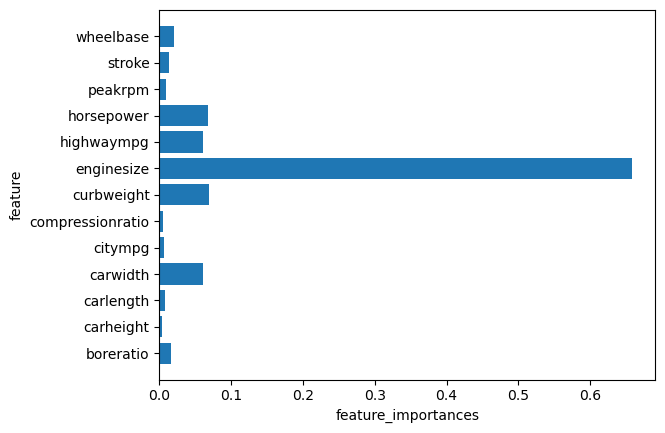

In [61]:
n_features = x_train.shape[1]
importances = reg.feature_importances_
column_nm = features

plt.barh(range(n_features), importances, align = 'center')
plt.yticks(np.arange(n_features), column_nm)
plt.xlabel('feature_importances')
plt.ylabel('feature')
plt.ylim(-1, n_features)
plt.show()

##### 랜덤포레스트

#### (1) 매개변수
n_estimators : RandomForest에서 나무의 수
- default = 100
- int형<br>

criterion : 노드를 분할할 때 사용할 함수
- gini(default) , entropy 중 선택<br>

**max_depth** : 트리의 최대 깊이 설정
- default = None(모든 노드의 불순도가 0 or 노드에 min_sample_split 미만의 샘플만 존재할 때까지 노드 확장)
- int로 설정<br>

**min_samples_split** : 내부노드를 분할하는 데 필요한 최소의 샘플 수 설정
- default = 2
- float로 설정<br>

**min_samples_leaf** : 리프노드에 있어야 하는 최소 샘플 수 설정
- default = 0.0
- float로 설정<br>

max_leaf_nodes : 리프 노드의 최대 개수 설정
- dafault = None(리프 노드 수에 제한이 없음)
- str 설정<br>

max_feature : 최상의 분할을 찾을 때 고려하는 변수의 개수
- dafult = None
- int 또는 'auto','sqrt','log2' 중 선택 가능<br>
- classifier만 사용가능

bootstrap : 샘플을 복원추출할지 여부를 결정
- default = True (False이면 전체 데이터세트가 트리를 생성할 때 사용됨)
- bool형<br>

oob_score : 정확도 측정을 위해 out-of-bag 샘플을 사용할지 여부를 결정
- default = 0
- int형<br>

random_state : 추정량의 임의성을 제어 
- default = None
- int형<br>

ccp_alpha : pruning(가지치기)에 사용하는 파라미터
- ccp_alpha보다 작은 비용-복잡성을 가진 서브트리 중 가장 비용-복잡성이 큰 트리를 선택
- default = 0.0/ float로 설정
- 값이 클수록 정리되는 가지의 수가 늘어남<br>

min_impurity_decrease : 해당 값보다 작거나 같은 수준으로 불순도가 감소할 경우 노드를 분할
- default = 0.0
- float로 설정<br>

---
#### (2) 속성
feature_importance_ : 변수중요도 반환
- (n_features,) 형태의 array<br>

oob_score_ : out-of-bag을 사용해 얻은 train 데이터세트의 점수
- oob_score_를 얻기 위해서는 oob_score 매개변수가 True로 설정되어야 한다.
- float 타입
- classifier만 사용 가능

---
#### (3) 메서드
fit(X,y) : 모델을 학습
- X : 학습데이터, 2차원 array 형태로 입력
- Y : 타깃데이터, (n_samples,) 또는 (n_samples, n_targets) 형태로 입력
- 반환값 : 결정트리 분류기를 object로 반환

predict(X) : 랜덤포레스트를 사용해 예측
- X : 데이터샘플
- 반환값 : 예측값을 array로 반환

predict_proba(X) : 확률을 추정
- X : 데이터샘플
- 반환값 : 클래스에 대한 샘플데이터의 확률
- classifier만 사용 가능

score(X,y) : 예측의 평균 정확도를 반환
- X : 테스트 샘플을 array로 입력
- y : X의 실제 값
- 반환값 : 평균 정확도를 float로 반환

In [76]:
import pandas as pd
breast = pd.read_csv('https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/breast-cancer.csv')

import numpy as np
from sklearn.model_selection import train_test_split
breast['diagnosis'] = np.where(breast['diagnosis'] == 'M',1,0)
features = ['area_mean','texture_mean']
x = breast[features]
y = breast['diagnosis']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3, stratify = y, random_state = 1)
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(398, 2) (171, 2)
(398,) (171,)


In [77]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators = 100, min_samples_split = 5)
pred = clf.fit(x_train, y_train).predict(x_test)
print('정확도 : ', clf.score(x_test, y_test))

정확도 :  0.9005847953216374


In [78]:
from sklearn.metrics import confusion_matrix, accuracy_score,precision_score, recall_score, f1_score

pred = clf.predict(x_test)

test_cm = confusion_matrix(y_test, pred)
test_acc = accuracy_score(y_test, pred)
test_prc = precision_score(y_test, pred)
test_rcll = recall_score(y_test, pred)
test_f1 = f1_score(y_test, pred)

print(test_cm)
print('\n')
print('정확도\t{}%'.format(round(test_acc*100,2)))
print('정밀도\t{}%'.format(round(test_prc*100,2)))
print('재현율\t{}%'.format(round(test_rcll*100,2)))
print('f1\t{}%'.format(round(test_f1*100,3)))

[[103   4]
 [ 13  51]]


정확도	90.06%
정밀도	92.73%
재현율	79.69%
f1	85.714%


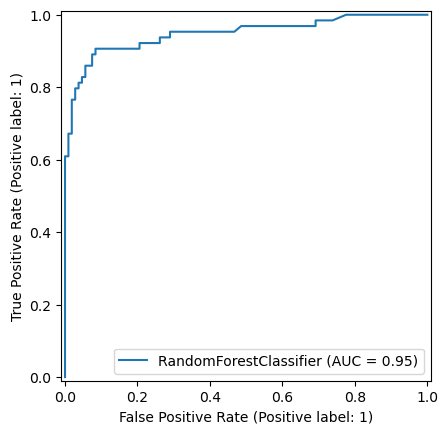

In [79]:
import matplotlib.pyplot as plt
# from sklearn.metrics import plot_roc_curve, roc_auc_score
from sklearn.metrics import RocCurveDisplay

# plot_roc_curve(clf, x_test, y_test)
RocCurveDisplay.from_estimator(clf, x_test, y_test)
plt.show()

In [80]:
importances = clf.feature_importances_
column_nm = pd.DataFrame(['area_mean','texture_mean'])
feature_importances = pd.concat([column_nm, pd.DataFrame(importances)], axis = 1)
feature_importances.columns = ['feature_nm','importances']
print(feature_importances)

     feature_nm  importances
0     area_mean      0.69656
1  texture_mean      0.30344


<BarContainer object of 2 artists>

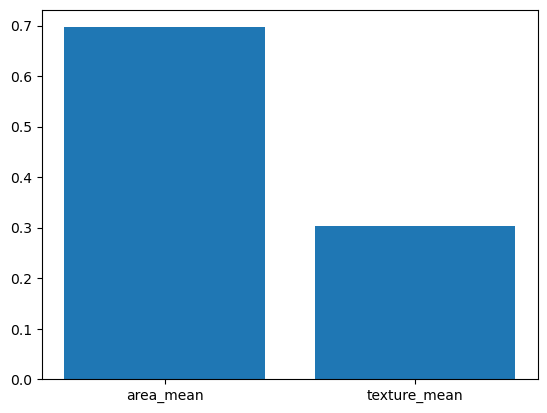

In [81]:
f = features
xtick_label_position = list(range(len(f)))
plt.xticks(xtick_label_position,f)
plt.bar([x for x in range(len(importances))], importances)

In [82]:
import pandas as pd
car = pd.read_csv('https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/CarPrice_Assignment.csv')

car_num = car.select_dtypes(['number'])
features = list(car_num.columns.difference(['car_ID','symboling','price']))
x = car_num[features]
y = car_num['price']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1)
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(143, 13) (62, 13)
(143,) (62,)


In [83]:
from sklearn.ensemble import RandomForestRegressor

reg = RandomForestRegressor()
pred = reg.fit(x_train, y_train).predict(x_test)

from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(y_test , pred)
mae = mean_absolute_error(y_test, pred)
rmse = np.sqrt(mse)
acc = reg.score(x_test, y_test)

print('MSE\t{}'.format(round(mse,3)))
print('MAE\t{}'.format(round(mae,3)))
print('RMSE\t{}'.format(round(rmse,3)))
print('ACC\t{}%'.format(round(acc*100,3)))

MSE	4061717.258
MAE	1321.122
RMSE	2015.37
ACC	93.272%


In [84]:
importances = reg.feature_importances_
column_nm = pd.DataFrame(features)
feature_importances = pd.concat([column_nm, pd.DataFrame(importances)], axis = 1)
feature_importances.columns = ['feature_nm','importances']
print(feature_importances)

          feature_nm  importances
0          boreratio     0.005585
1          carheight     0.003513
2          carlength     0.005520
3           carwidth     0.021509
4            citympg     0.003617
5   compressionratio     0.004533
6         curbweight     0.186952
7         enginesize     0.655122
8         highwaympg     0.061027
9         horsepower     0.030024
10           peakrpm     0.008715
11            stroke     0.004119
12         wheelbase     0.009765


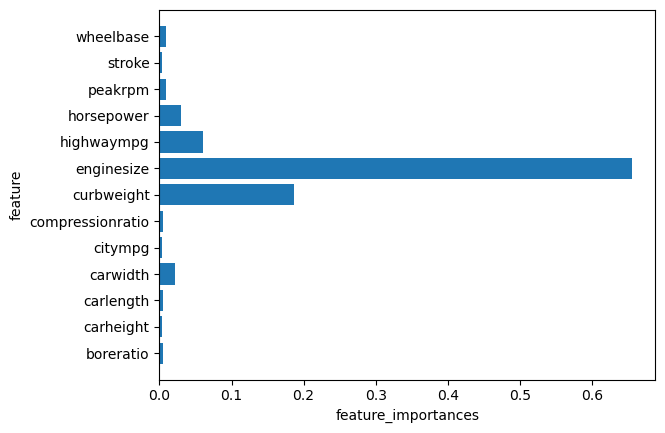

In [85]:
n_features = x_train.shape[1]
importances = reg.feature_importances_
column_nm = features

plt.barh(range(n_features), importances, align = 'center')
plt.yticks(np.arange(n_features), column_nm)
plt.xlabel('feature_importances')
plt.ylabel('feature')
plt.ylim(-1, n_features)
plt.show()